In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [7]:
df = pd.read_csv(r"C:\Users\vinay\Downloads\MRF_B1_Union_Budget.csv",encoding='latin1')
df.head()

,SI. No. Parameters,2021-2022 Actuals,2022-2023 BR,2022-2023 RE,2023-2024 BE
0,1. Revenue Receipts,2169905.0,2204422.0,2348413.0,2632281.0
1,2. Tax Revenue (Net to Centre),1804793.0,1934771.0,2086662.0,2330631.0
2,3. Non Tax Revenue,365112.0,269651.0,261751.0,301650.0
3,4. Capital Receipts ¹,1623896.0,1740487.0,1838819.0,1870816.0
4,5. Recovery of Loans,24737.0,14291.0,23500.0,23000.0


In [8]:
df.columns

Index(['SI. No.        Parameters', '2021-2022 Actuals', '2022-2023 BR',
       '2022-2023 RE', '2023-2024 BE'],
      dtype='object')

In [9]:
df.shape

(22, 5)

In [10]:
df.info

<bound method DataFrame.info of                             SI. No.        Parameters  2021-2022 Actuals  \
0                                 1. Revenue Receipts          2169905.0   
1                      2. Tax Revenue (Net to Centre)          1804793.0   
2                                  3. Non Tax Revenue           365112.0   
3                               4. Capital Receipts ¹          1623896.0   
4                                5. Recovery of Loans            24737.0   
5                                   6. Other Receipts            14638.0   
6                7. Borrowings and Other Liabilities²          1584521.0   
7                             8. Total Receipts (1+4)          3793801.0   
8                        9. Total Expenditure (10+13)          3793801.0   
9                     10. On Revenue Account of which          3200926.0   
10                              11. Interest Payments           805499.0   
11  12. Grants in Aid for creation of capital assests   

In [11]:
df.describe

<bound method NDFrame.describe of                             SI. No.        Parameters  2021-2022 Actuals  \
0                                 1. Revenue Receipts          2169905.0   
1                      2. Tax Revenue (Net to Centre)          1804793.0   
2                                  3. Non Tax Revenue           365112.0   
3                               4. Capital Receipts ¹          1623896.0   
4                                5. Recovery of Loans            24737.0   
5                                   6. Other Receipts            14638.0   
6                7. Borrowings and Other Liabilities²          1584521.0   
7                             8. Total Receipts (1+4)          3793801.0   
8                        9. Total Expenditure (10+13)          3793801.0   
9                     10. On Revenue Account of which          3200926.0   
10                              11. Interest Payments           805499.0   
11  12. Grants in Aid for creation of capital assests 

In [12]:
df.columns = ['parameters', 'actual_2021', 'budget_2022', 'revised_2022', 'budget_2023']

In [13]:
df['parameters'] = df['parameters'].str.strip()

In [14]:
df_long = pd.melt(df, id_vars='parameters', var_name='year_type', value_name='amount')

In [15]:
df_long.head()

,parameters,year_type,amount
0,1. Revenue Receipts,actual_2021,2169905.0
1,2. Tax Revenue (Net to Centre),actual_2021,1804793.0
2,3. Non Tax Revenue,actual_2021,365112.0
3,4. Capital Receipts ¹,actual_2021,1623896.0
4,5. Recovery of Loans,actual_2021,24737.0


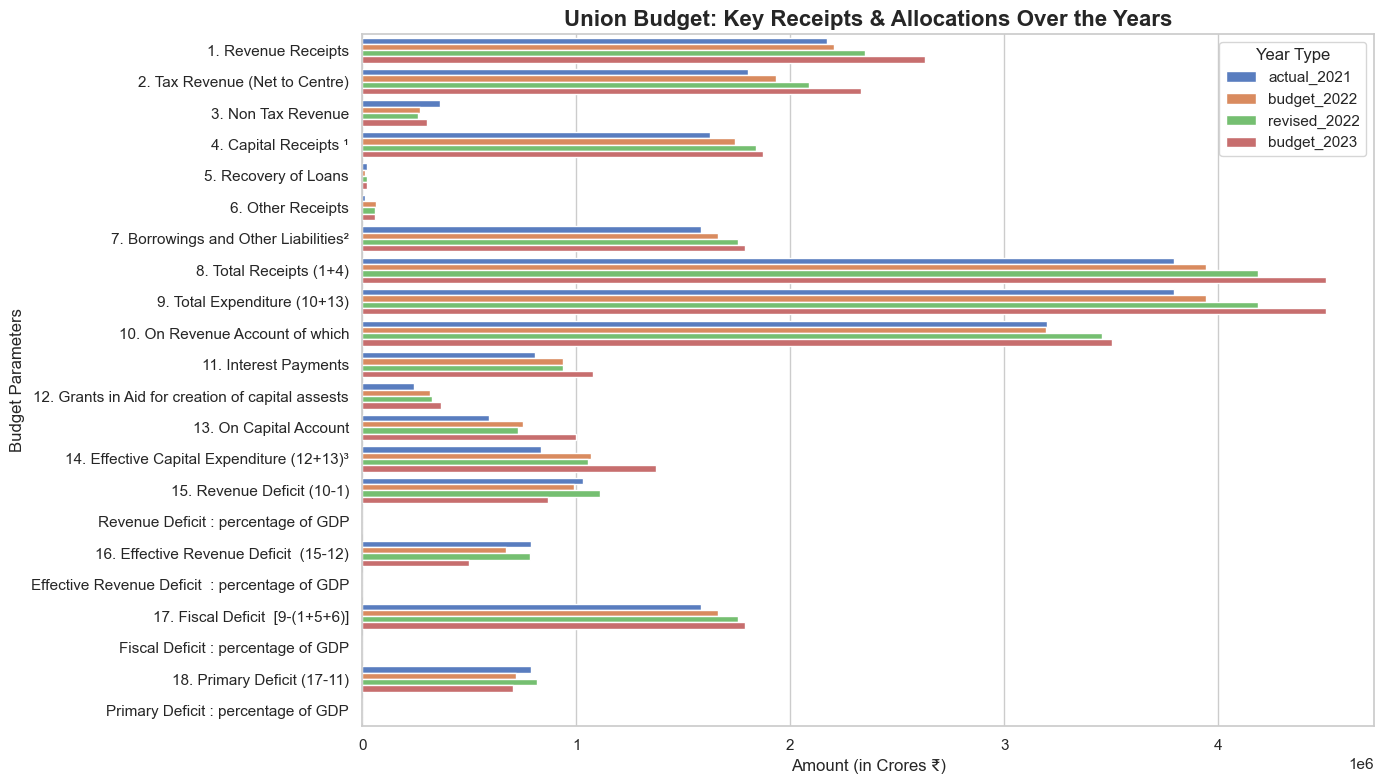

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (14, 8)

order = ['actual_2021', 'budget_2022', 'revised_2022', 'budget_2023']
df_long['year_type'] = pd.Categorical(df_long['year_type'], categories=order, ordered=True)

plt.figure()
sns.barplot(data=df_long, x='amount', y='parameters', hue='year_type')

plt.title("Union Budget: Key Receipts & Allocations Over the Years", fontsize=16, fontweight='bold')
plt.xlabel("Amount (in Crores ₹)", fontsize=12)
plt.ylabel("Budget Parameters", fontsize=12)
plt.legend(title="Year Type", title_fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\vinay\AppData\Local\Temp\ipykernel_15420\137189664.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_budget = df_long.groupby('year_type')['amount'].sum().reset_index()


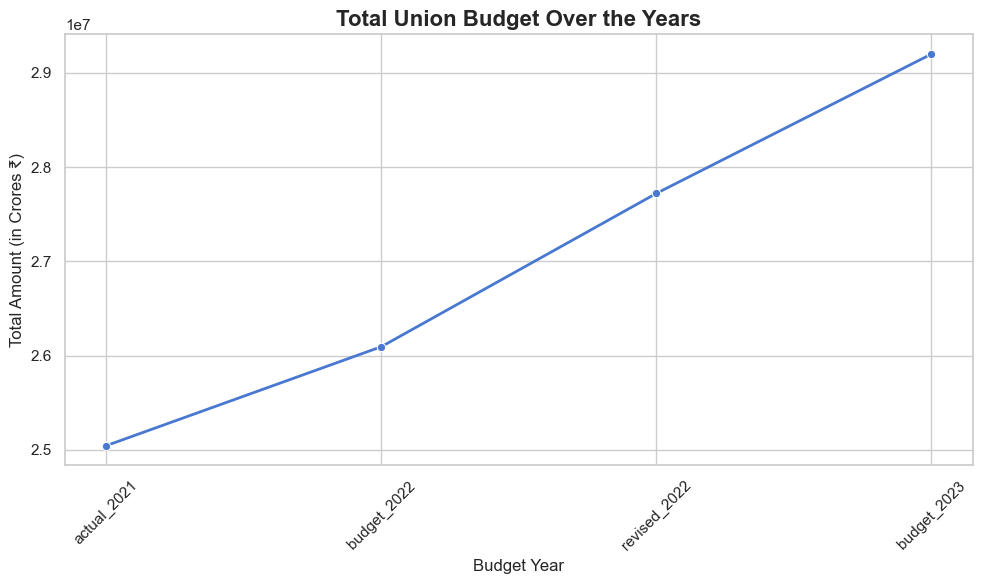

In [20]:
df_long['amount'] = df_long['amount'].replace(',', '', regex=True).astype(float)

total_budget = df_long.groupby('year_type')['amount'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=total_budget, x='year_type', y='amount', marker='o', linewidth=2)

plt.title("Total Union Budget Over the Years", fontsize=16, fontweight='bold')
plt.ylabel("Total Amount (in Crores ₹)", fontsize=12)
plt.xlabel("Budget Year", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [21]:
total_budget['percent_change'] = total_budget['amount'].pct_change() * 100

print("📈 Percentage Growth of Total Budget:")
print(total_budget[['year_type', 'percent_change']])

📈 Percentage Growth of Total Budget:
      year_type  percent_change
0   actual_2021             NaN
1   budget_2022        4.191143
2  revised_2022        6.232710
3   budget_2023        5.332344


C:\Users\vinay\AppData\Local\Temp\ipykernel_15420\3260570799.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_budget = df_long.groupby('year_type')['amount'].sum().reset_index()
C:\Users\vinay\AppData\Local\Temp\ipykernel_15420\3260570799.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_budget, x='year_type', y='percent_change', palette='coolwarm')


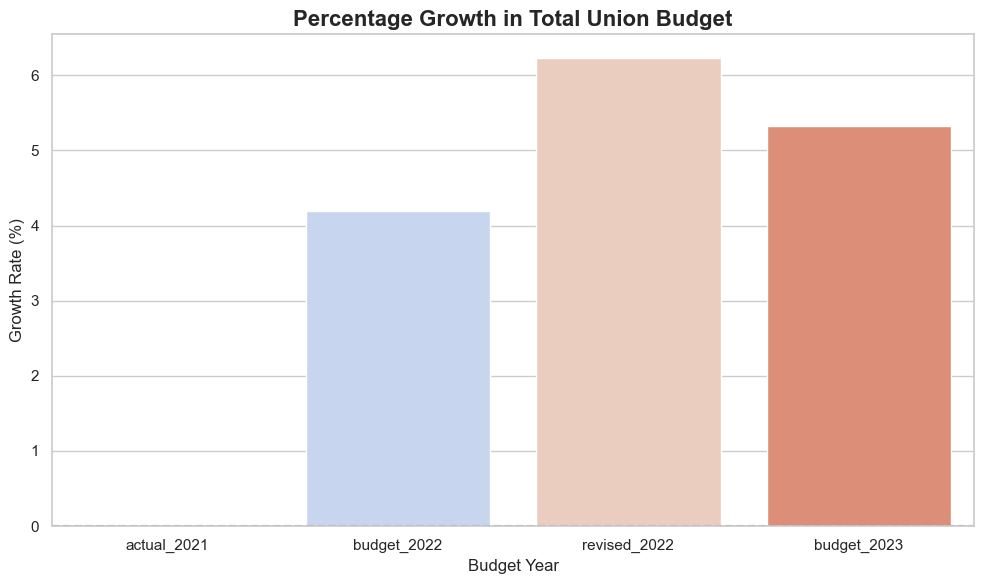

,year_type,percent_change
0,actual_2021,NaN
1,budget_2022,4.191143
2,revised_2022,6.232710
3,budget_2023,5.332344


In [22]:
df_long['amount'] = df_long['amount'].replace(',', '', regex=True).astype(float)
total_budget = df_long.groupby('year_type')['amount'].sum().reset_index()

total_budget['percent_change'] = total_budget['amount'].pct_change() * 100

plt.figure(figsize=(10,6))
sns.barplot(data=total_budget, x='year_type', y='percent_change', palette='coolwarm')

plt.title("Percentage Growth in Total Union Budget", fontsize=16, fontweight='bold')
plt.ylabel("Growth Rate (%)", fontsize=12)
plt.xlabel("Budget Year", fontsize=12)
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

total_budget[['year_type', 'percent_change']]